### Plot emittance growth rates for different studies, uploaded from a pickle file

In [1]:
import sys
sys.path.append('../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting paramerters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Define study parameters

In [3]:
n_runs = 4 # number of runs that the simulation was repeated
turns = 5e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

In [4]:
my_variables = list(np.arange(0.0, 5.5, 0.5))
# my_variables = ['']
print(my_variables)

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


#### 2) Load data

In [38]:
path_to_data = './'
noise_type = 'PN'

study_name_1 = 'deyRates_globalCC2deg90_1MV_realNoise_PNCoast3PartC_noKlofKlod_5e5turns_Nb20k_b3b5b7_QpyQpxIterate'
study_name_2 = 'deyRates_globalCC2deg90_1MV_realNoise_PNCoast3PartC_KlofKlod1_5e5turns_Nb20k_b3b5b7_QpyQpxIterate'


my_df1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ) )
my_df2 = pickle.load( open(path_to_data+study_name_2+'.pkl', "rb" ) )

In [59]:
my_df2

,QxQy_0.0,QxQy_0.5,QxQy_1.0,QxQy_1.5,QxQy_2.0,QxQy_2.5,QxQy_3.0,QxQy_3.5,QxQy_4.0,QxQy_4.5,QxQy_5.0
m,"[2.0134318506585626e-08, 1.9954870141007934e-0...","[1.883329551671436e-08, 1.9263182021897513e-08...","[1.9879441431596255e-08, 2.0792102865197554e-0...","[2.0065695925081704e-08, 2.0491646251506057e-0...","[2.0097494500761147e-08, 2.0078484408432063e-0...","[1.8824703899861144e-08, 2.049077046266562e-08...","[1.9548597004505486e-08, 1.9785829309836143e-0...","[1.8124871426487326e-08, 1.9480692206440305e-0...","[1.9012901673505696e-08, 1.9081113497360674e-0...","[1.9679508107172697e-08, 1.9992213562674993e-0...","[2.1466169353529615e-08, 2.0047860302642033e-0..."
b,"[2.061974039322572e-06, 2.0728480218672464e-06...","[2.048192404573617e-06, 2.0822363416078018e-06...","[2.088393342333932e-06, 2.0532507352754365e-06...","[2.0737186265825073e-06, 2.0847227114378453e-0...","[2.0614080548922464e-06, 2.0949668660047435e-0...","[2.0619817815815955e-06, 2.0601443771043074e-0...","[2.0869767114982006e-06, 2.044037309894644e-06...","[2.0783661169609248e-06, 2.067945124718476e-06...","[2.0862968167054024e-06, 2.044365225569486e-06...","[2.0695908557433223e-06, 2.057149562505665e-06...","[2.05012617897685e-06, 2.074525844573036e-06, ..."
err,"[1.891681228347609e-12, 1.961809273525269e-12,...","[1.9515106191044063e-12, 2.0271173636771427e-1...","[1.963356310340001e-12, 1.7254429310839344e-12...","[2.251119464261343e-12, 1.886582227702146e-12,...","[1.9841185757111655e-12, 1.8266165774871263e-1...","[2.2233880818888587e-12, 1.9619890650523066e-1...","[2.5206893727420044e-12, 2.06797756817573e-12,...","[1.8834937895904246e-12, 2.18069518380577e-12,...","[2.1636346270107856e-12, 2.179705389480868e-12...","[2.261249918277369e-12, 2.071955885715142e-12,...","[2.4283438316847696e-12, 2.1666758963024496e-1..."


In [40]:
my_df_keys = list(my_df1.keys()) # same keys for my_df1 and my_df2

In [35]:
my_df1[my_df_keys[7]]['m']

[1.778888733527382e-08,
 1.8775675810436506e-08,
 1.8909112427597114e-08,
 2.0516065687565003e-08]

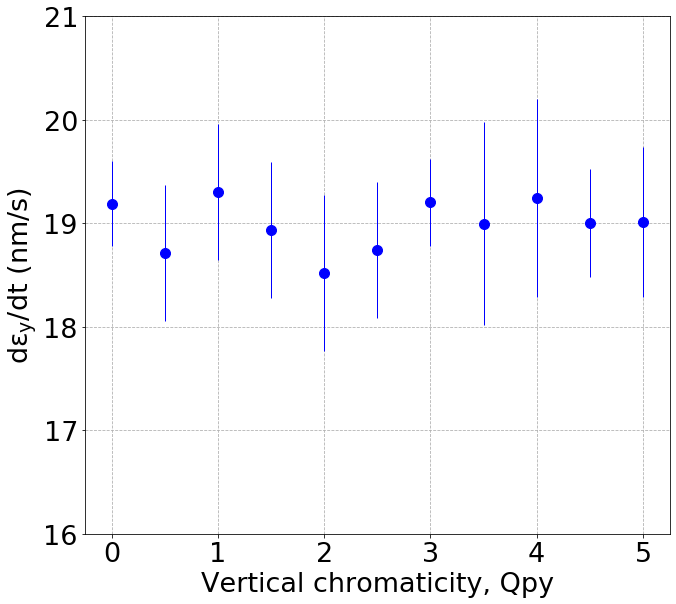

In [61]:
labels= ['ocutpoles OFF', 'klof=klod= 1 '+r'$\mathrm{m^{-4}}$']

for i, key in enumerate(my_df_keys):
    plt.errorbar(my_variables[i], np.mean(my_df1[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df1[my_df_keys[i]]['m'])*1e9, marker='o',  c='b', label='octupoles OFF')
    #plt.errorbar(my_variables[i], np.mean(my_df2[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df2[my_df_keys[i]]['m'])*1e9, marker='o',  c='g')
    
plt.ylim(16, 21)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical chromaticity, Qpy')
plt.tight_layout()


### Compute the theoretically expected growth 

In [43]:
# Machine parameters
betay = 73 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
beta_0 = 0.999999
gamma_0 = 287.7
sigma_z = 0.139 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
circumference = 6911.5623
frev = clight/circumference # Hz
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = 3.99e-11 #(A_amplitude * scale_factor)**2/frev # V^2/Hz
print(PSD_phi, PSD_A)

1.42e-10 3.99e-11


In [44]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5327231543595903, CDeltaA = 0.23363842282020486
expected growth = 20.501405387414138 nm/s


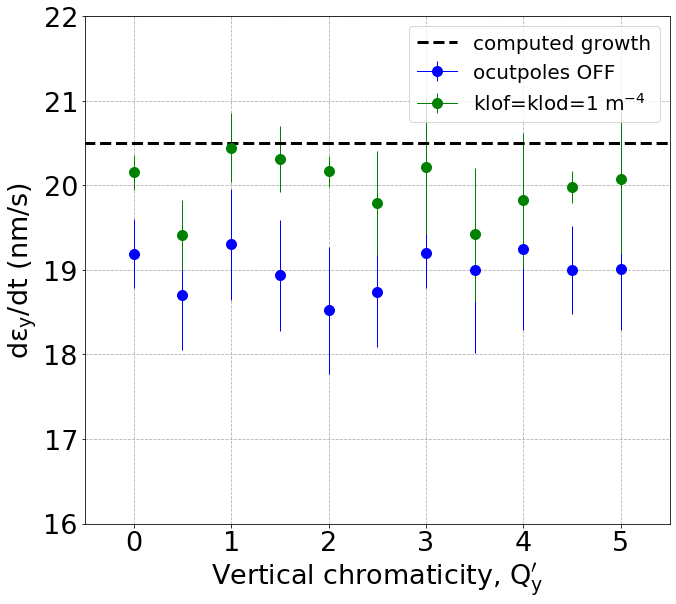

In [67]:
labels= ['ocutpoles OFF', 'klof=klod=1 '+r'$\mathrm{m^{-4}}$']

for i, key in enumerate(my_df_keys):
    if i == 0:
        plt.errorbar(my_variables[i], np.mean(my_df1[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df1[my_df_keys[i]]['m'])*1e9, marker='o',  c='b', label=labels[0])
        plt.errorbar(my_variables[i], np.mean(my_df2[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df2[my_df_keys[i]]['m'])*1e9, marker='o',  c='g', label=labels[1])
    else:
        plt.errorbar(my_variables[i], np.mean(my_df1[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df1[my_df_keys[i]]['m'])*1e9, marker='o',  c='b')
        plt.errorbar(my_variables[i], np.mean(my_df2[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df2[my_df_keys[i]]['m'])*1e9, marker='o',  c='g')
        
plt.hlines(expected_growth*1e9, -1, 7, linestyles='dashed', linewidth=3, color='k', label='computed growth')
plt.xlim(-0.5, 5.5)
plt.ylim(16, 22)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical chromaticity, '+ r'$\mathrm{Q^\prime_y}$')

plt.legend()

plt.tight_layout()
#plt.savefig('dey_Qy_ocutpoles_OFF_vs_ON.png')

compute tune spread from chroma and octupoles and chromatic sextupoles 

chromatic effect is not importnat, the detuning from the chromatic sextupoles is differnet at each case ??